In [5]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hutchins\Software\Anaconda3

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  brotli             pkgs/main/win-64::brotli-1.0.9-ha925a31_2
  cycler             pkgs/main/win-64::cycler-0.10.0-py38_0
  fonttools          pkgs/main/noarch::fonttools-4.25.0-pyhd3eb1b0_0
  icc_rt             pkgs/main/win-64::icc_rt-2019.0.0-h0cc432a_1
  kiwisolver         pkgs/main/win-64::kiwisolver-1.3.1-py38hd77b12b_0
  matplotlib         pkgs/main/win-64::matplotlib-3.4.2-py38haa95532_0
  matplotlib-base    pkgs/main/win-64::matplotlib-base-3.4.2-py38h49ac443_0
  munkres            pkgs/main/noarch::munkres-1.1.4-py_0
  scipy              pkgs/main/win-64::scipy-1.7.1-py38hbe87c03_2
  seaborn            pkgs/main/noarch::seaborn-0.11.2-pyhd3eb1b0_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working...

In [1]:
import pandas as pd

In [2]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')

In [3]:
%whos

Variable         Type         Data/Info
---------------------------------------
mortality_data   DataFrame         Year     AgeGroup  D<...>n\n[476 rows x 4 columns]
pd               module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>


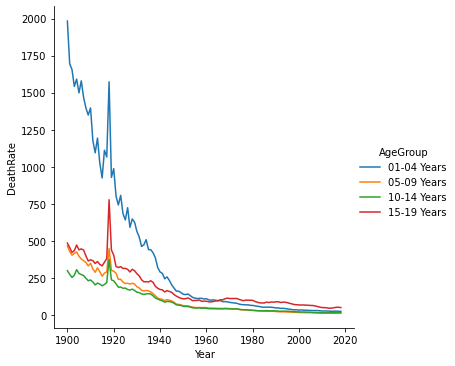

In [5]:
# General relplot() method is used to create the plot. 'kind' parameter is required and
# set to ‘line’, and the x and y parameters are set to the Year and DeathRate columns. 
import seaborn as sns
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', hue='AgeGroup')


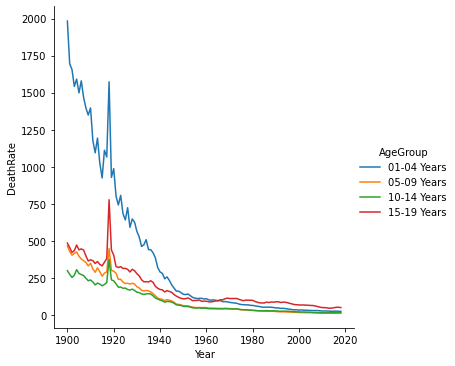

In [6]:
# Create the same plot with the specific lineplot() method. Only difference in the parameters
# is that the kind parameter isn’t required.
# Specific method makes wider/shorter plots by default
# General methods allow subplots, but specific ones don't 
import seaborn as sns
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', hue='AgeGroup')


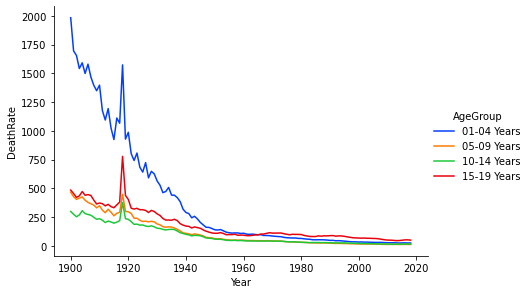

In [7]:
# Hue parameter is set to the AgeGroup 
# Palette parameter is set to bright
# Height set to 4 inches and aspect set to 1.5, the width will be 1.5 times the height
import seaborn as sns
sns.relplot(data=mortality_data, kind='line', \
    x='Year', y='DeathRate', hue='AgeGroup', palette='bright', height=4, aspect=1.5)


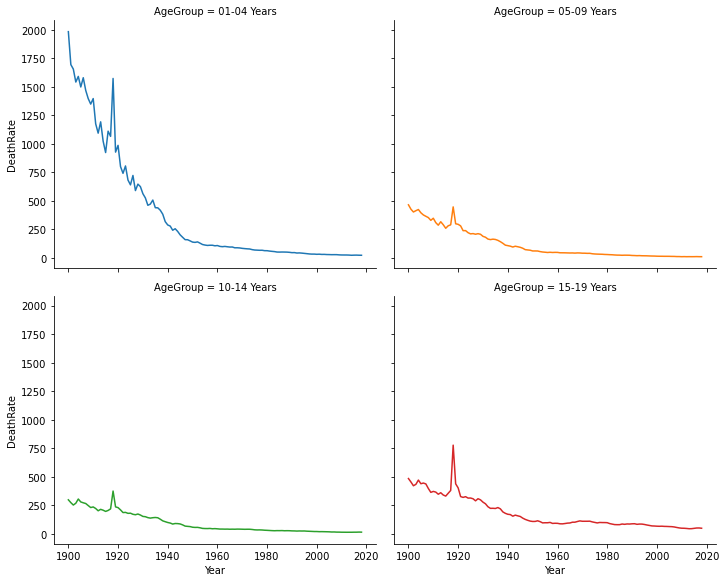

In [8]:
# Example creates a plot with four subplots
# Aspect parameter has been set to 1.25 instead of 1.5
# Legend parameter is set to False so the legend won’t be displayed.
# Instead, the subplots titles are generated automatically
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', \
    hue='AgeGroup', height=4, aspect=1.25, \
    col='AgeGroup', col_wrap=2, legend=False)


[Text(0.5, 1.0, 'Deaths by Age Group'), Text(0, 0.5, 'Deaths per 100,000')]

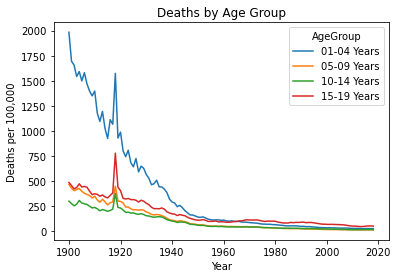

In [9]:
# Data structures and objects
# Specific method returns an Axes object
# General method returns a FacetGrid object that contains one or more Axes objects
ax = sns.lineplot(data=mortality_data, \
    x='Year', y='DeathRate', hue='AgeGroup')
ax.set(title='Deaths by Age Group', ylabel='Deaths per 100,000')


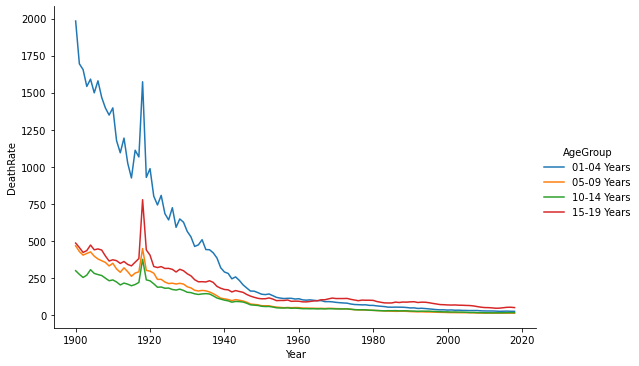

In [11]:
# FacetGrid object, and that object is assigned to a variable named g.
# Then, the code loops through the Axes objects contained in the FacetGrid object
# Inside the loop, you can use the set() method
g = sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', hue='AgeGroup', aspect=1.5)


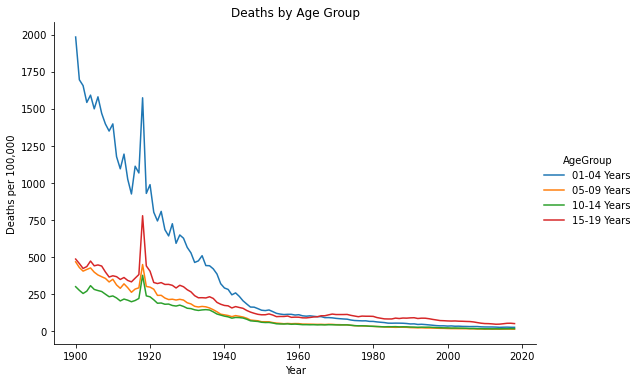

In [13]:
# Shouldn't work but does
# Alternatively try g.figure 
g.set(title='Deaths by Age Group', ylabel='Deaths per 100,000')
g.fig

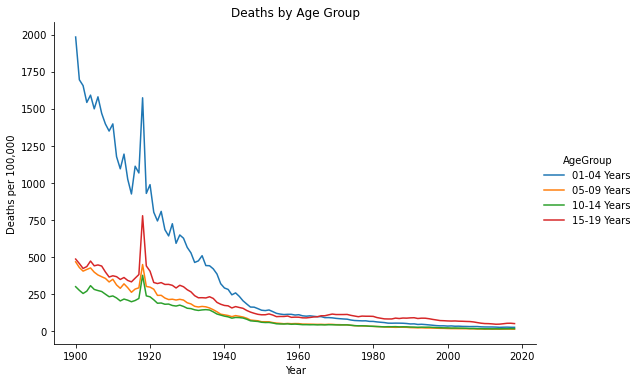

In [16]:
# Do this instead
for ax in g.axes.flat:
    ax.set(title='Deaths by Age Group', ylabel='Deaths per 100,000')
g.fig

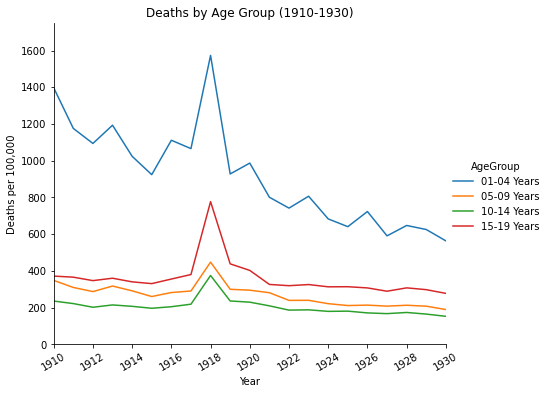

In [17]:
# Four more parameters for the set() method that can help you enhance a plot
# xticks and yticks parameters set specific tick values for your plots
# Use the xlim and ylim parameters to limit the data that’s presented in your plots
g = sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)
for ax in g.axes.flat:
    ax.set(title='Deaths by Age Group (1910-1930)', ylabel='Deaths per 100,000', \
    xticks=[x for x in range(1910, 1931, 2)], xlim=(1910,1930), ylim=(0,1750)), \
    ax.tick_params('x', labelrotation=30)


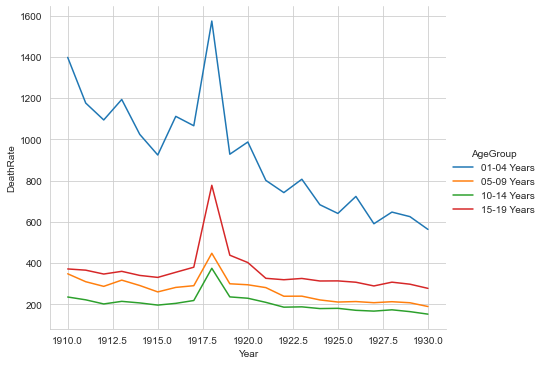

In [18]:
# To set the background style for a plot, you use the set_style() method
# darkgrid, whitegrid, dark, white, and ticks
sns.set_style('whitegrid')
sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'), \
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)

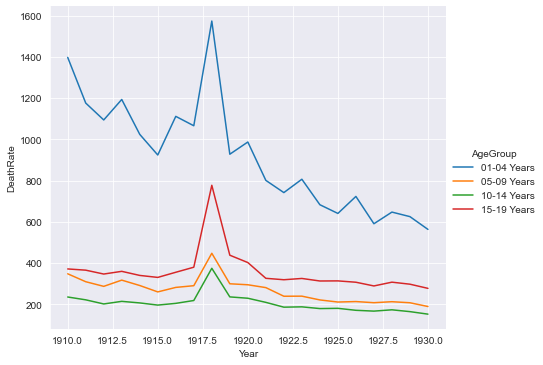

In [19]:
sns.set_style('darkgrid')
sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'), \
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)


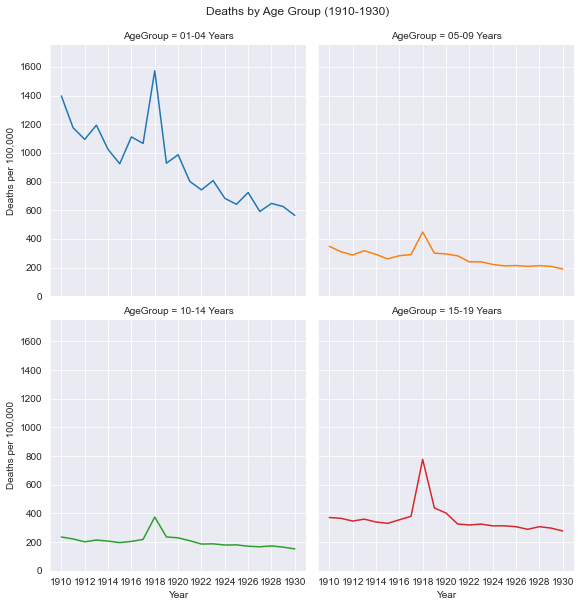

In [20]:
# A plot that has subplots, only difference is that the col parameter = AgeGroup
# col_wrap parameter is set to 2 so there are two subplots in each row
# This code uses the 'fig' attribute of the FacetGrid object to access
# the Figure object that contains the FacetGrid object. Then, it uses the
# suptitle() method of the Figure object to add a title to the plot.subplots.
g = sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'), kind='line', \
    x='Year', y='DeathRate', hue='AgeGroup', legend=False, col='AgeGroup', col_wrap=2, height=4)
g.fig.suptitle('Deaths by Age Group (1910-1930)', y=1.025)
for ax in g.axes.flat:
    ax.set(ylabel='Deaths per 100,000', xticks=[x for x in range(1910,1931,2)], ylim=(0,1750))


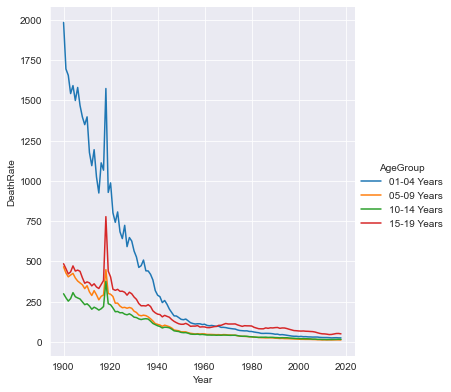

In [25]:
# Use the savefig() method of the FacetGrid object (or Figure object) to save the file
g = sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', hue='AgeGroup')


In [ ]:
# This reduces the height
g.fig.subplots_adjust(bottom=0.35) # adjust the bottom to fix the y labels


In [26]:
# Save
g.savefig('lineChart.png')
# also can do different folder or filetype g.savefig('figures/lineChart.pdf')

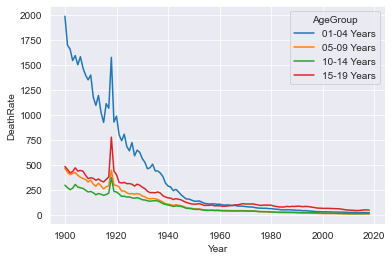

In [28]:
# To get a figure from an Axes object use the getfigure() method from the Axes object
ax = sns.lineplot(data=mortality_data, \
    x='Year', y='DeathRate', hue='AgeGroup')
ax.get_figure().savefig('lineChart.png')

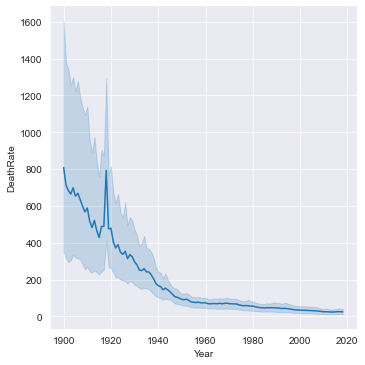

In [29]:
# 2 kinds of relational plots: line plots and scatter plots
# If you don't specify a hue and you have groups, it will average
# and give shaded confidence intervals
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate')

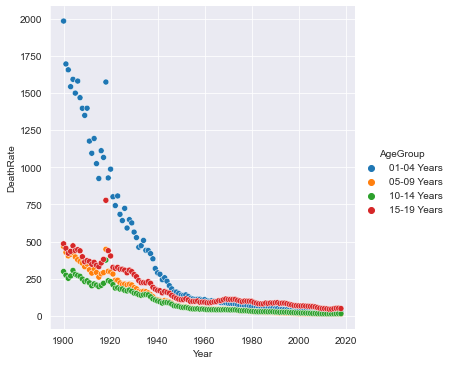

In [30]:
# Code for a scatter plot
sns.relplot(data=mortality_data, \
    kind='scatter', x='Year', y='DeathRate', hue='AgeGroup') 

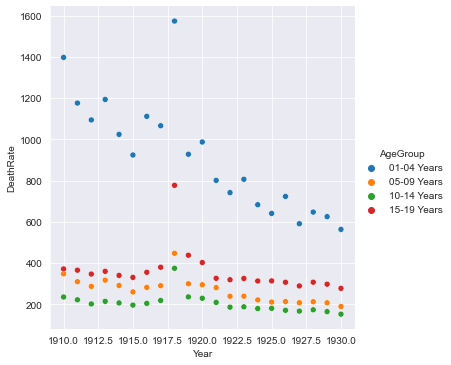

In [31]:
# Use a query on the data frame to select a specific time range
g = sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'), \
                kind='scatter', x='Year', y='DeathRate', hue='AgeGroup')

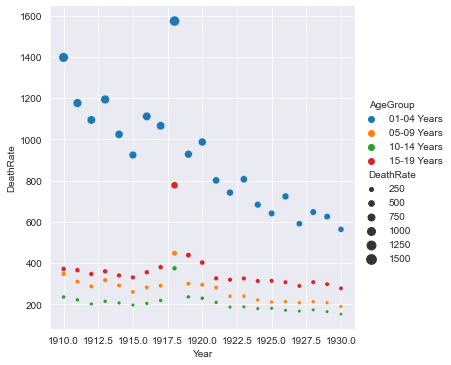

In [33]:
# Make into a bubble plot by giving it a column to use for sizing
# Specify a min and max size; otherwise your viz may
# be dominated by outliers
g = sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'),
                kind='scatter', x='Year', y='DeathRate', hue='AgeGroup',
                size='DeathRate', sizes=(10,100))

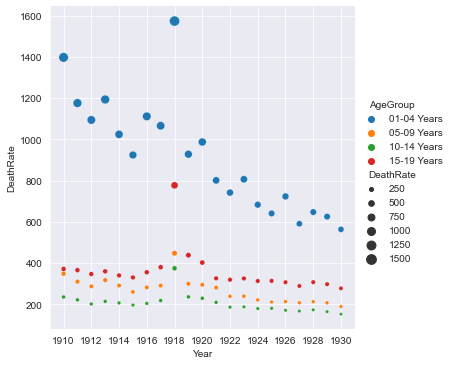

In [38]:
# Manually assign x-axis ticks
#for ax in g.axes.flat:
#    ax.set(xticks=[x for x in range(1910,1931,2)]) 
for ax in g.axes.flat:
    ax.set(xticks=range(1910,1931,2))
g.fig

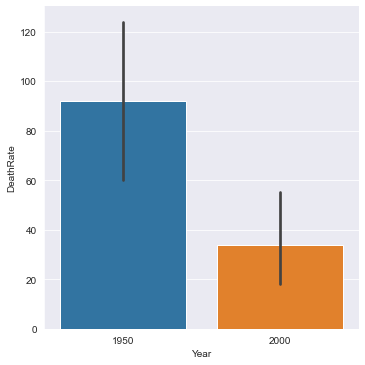

In [47]:
# Bar plots
sns.catplot(data=mortality_data.query('Year in (1950,2000)'),
            kind='bar', x='Year', y='DeathRate', ci=95)

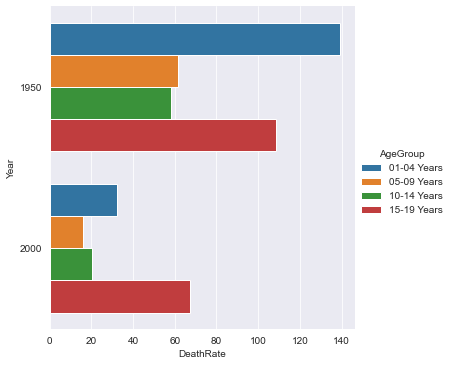

In [48]:
# Make it horizontal with orient='h' and split by age group with hue
sns.catplot(data=mortality_data.query('Year in (1950,2000)'),
            kind='bar', x='DeathRate', y='Year', hue='AgeGroup', orient='h')

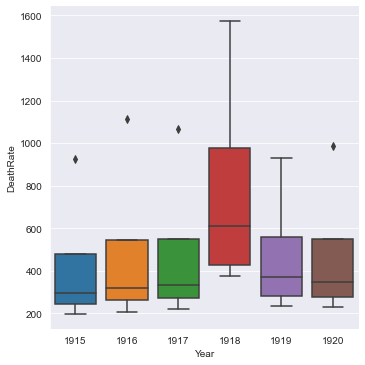

In [49]:
# Code for a bow-and-whisker
# Can make hirizontal with orient='h'
sns.catplot(data=mortality_data.query('Year >= 1915 and Year <= 1920'),
            kind='box', x='Year', y='DeathRate')


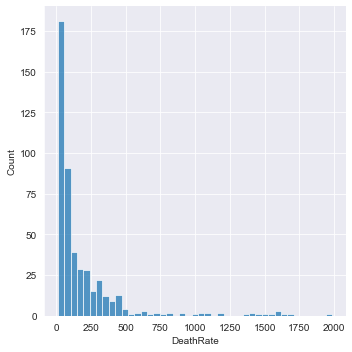

In [50]:
# Code for a histogram
sns.displot(data=mortality_data, kind='hist', x='DeathRate')

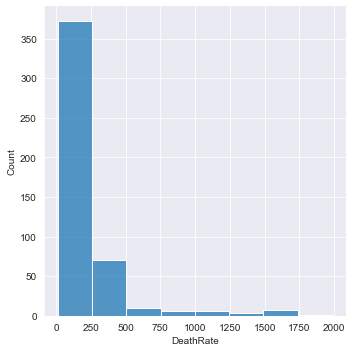

In [51]:
# Modify number of bins with 'bins' parameter
sns.displot(data=mortality_data, kind='hist', x='DeathRate', bins=8)

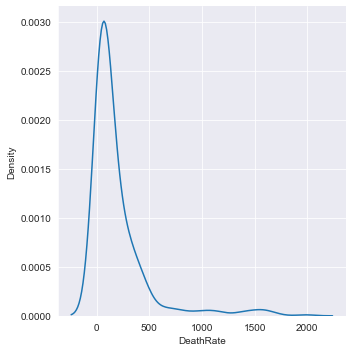

In [52]:
# Code for a density plot
sns.displot(data=mortality_data, kind='kde', x='DeathRate')

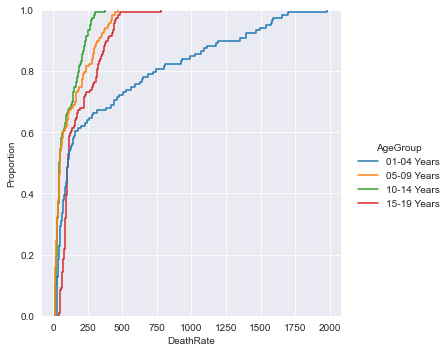

In [53]:
# Can make it cumulative with kind='ecdf' instead of 'kde'
sns.displot(data=mortality_data, kind='ecdf', x='DeathRate', hue='AgeGroup')

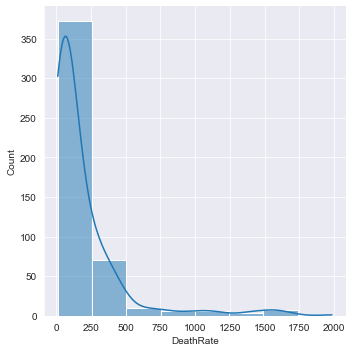

In [54]:
# Histogram AND density plot with kind='hist' and kde=True
sns.displot(data=mortality_data, kind='hist', x='DeathRate', kde=True, bins=8)

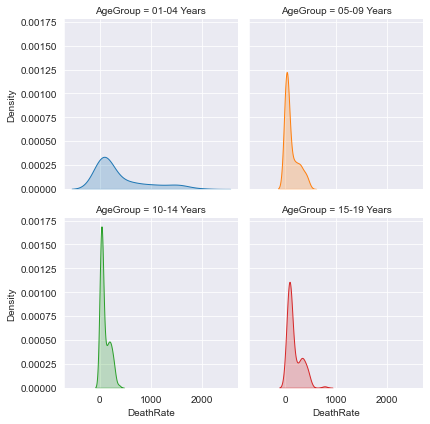

In [58]:
# Density subplots for easier comparison
sns.displot(data=mortality_data, kind='kde', x='DeathRate',
            col='AgeGroup', col_wrap=2, height=3, 
            hue='AgeGroup', fill=True, legend=False)

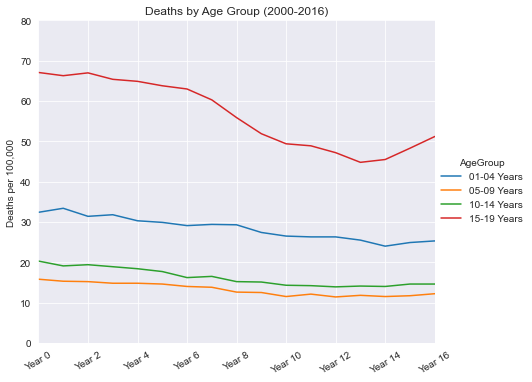

In [59]:
# Other Axes methods to adjust viz
g = sns.relplot(data=mortality_data, kind='line',
    x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)
for ax in g.axes.flat:
    ax.set_title('Deaths by Age Group (2000-2016)')
    ax.set_xlabel('')
    ax.set_xticks([x for x in range(2000,2017,2)])
    ax.set_xticklabels(['Year ' + str(x) for x in range(0,17,2)])
    ax.tick_params('x', labelrotation=30)
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xlim(2000,2016)
    ax.set_ylim(0,80)

Text(0, 0.5, 'Deaths per 100,000')

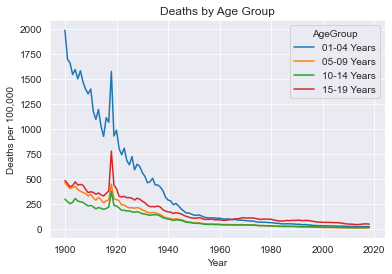

In [63]:
# Create plot to annotate
ax = sns.lineplot(data=mortality_data, \
    x='Year', y='DeathRate', hue='AgeGroup')
ax.set_title('Deaths by Age Group')
ax.set_ylabel('Deaths per 100,000') 

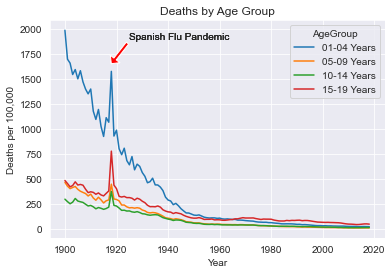

In [66]:
ax.annotate(text='Spanish Flu Pandemic', xy=(1918, 1650),
            xytext=(1925, 1900),
            arrowprops=dict(facecolor='red', width=3, headwidth=12, headlength=6))
ax.figure

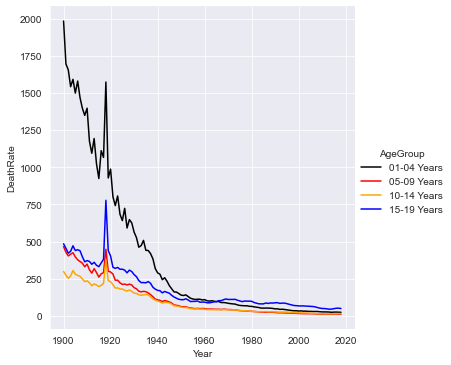

In [67]:
# Set the color palette
colors = ['black','red','orange','blue']
sns.set_palette(sns.color_palette(colors))
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate', hue='AgeGroup')

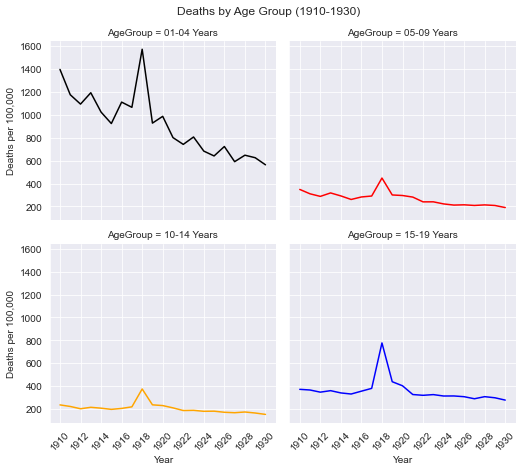

In [68]:
g = sns.relplot(
data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='line', x='Year', y='DeathRate', hue='AgeGroup',
    legend=False, col='AgeGroup', col_wrap=2,
    height=3, aspect=1.2)
g.fig.suptitle('Deaths by Age Group (1910-1930)', y=1.025)
for ax in g.axes.flat:
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xticks([x for x in range(1910, 1931, 2)])
    ax.tick_params('x', labelrotation=45)

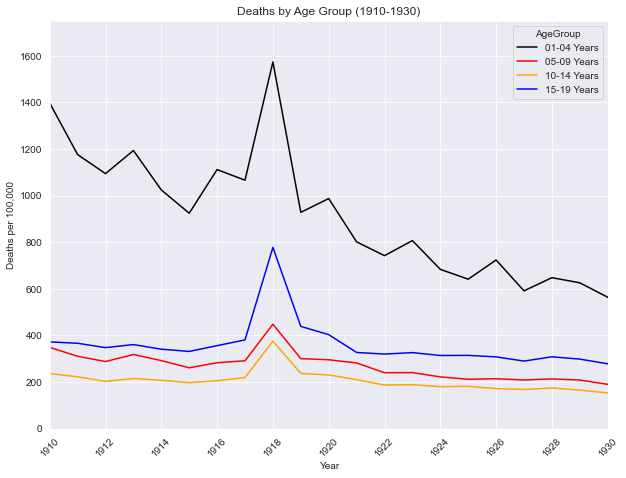

In [82]:
# Not covered: setting sizes on specific plots.
# Please read the book on how to do this
# It's so clunky it hurts
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7.5))
sns.lineplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup')
ax.set(title='Deaths by Age Group (1910-1930)', ylabel='Deaths per 100,000',
    xticks=[x for x in range(1910, 1931, 2)], xlim=(1910,1930), ylim=(0,1750))
ax.tick_params('x', labelrotation=45)